Ejercicio 2
Implementa un modelo que tenga las siguientes características:
• Capa de entrada de tamaño 256x256x3.
• Dos capas convolucionales (una a continuación de la otra) con las siguientes propiedades:
• 1ª capa: 16 filtros de 3x3, con stride (1, 1) y padding tal que mantenga el tamaño de la imagen.
• 2ª capa: 32 filtros de 5x5, con stride (2,2) y sin padding.
• Las dos capas convolucionales emplearán una función de activación ReLU.
• Capa de Max Pooling de forma que se reduzca el tamaño de la imagen a la mitad.

In [17]:
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [11]:
input_layer = layers.Input(shape=[256, 256, 3])

layer_conv1 = layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding="same", activation="relu")(
    input_layer)
layer_conv2 = layers.Conv2D(filters=32, kernel_size=(5, 5), strides=(2, 2), activation="relu")(layer_conv1)

pool = layers.MaxPool2D(pool_size=(2, 2))(layer_conv2)
model = Model(inputs=[input_layer], outputs=[pool])
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 conv2d_17 (Conv2D)          (None, 126, 126, 32)      12832     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
Total params: 13280 (51.88 KB)
Trainable params: 13280 (51.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


• ¿Qué tamaño de imagen de salida habéis obtenido?
  - He obtenido una de imagen de salida de 63 x 63

• ¿Cuántos parámetros debe ajustar el modelo en total?
  - El modelo debe ajustar un total de 13280 parametros

In [18]:
img = Image.open('./imgs/your-name-resized.png')
img = np.array(img)
if len(img.shape) > 2 and img.shape[2] == 4:
    #convert the image from RGBA2RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
# Añadimos primera dimensión para construir matriz tal que tengamos [n imagenes, n filas, n columnas,
# n canales]
img = np.expand_dims(img, axis=0)
print('Tamaño de imagen original: ', img.shape)

Tamaño de imagen original:  (1, 256, 256, 3)


In [22]:
img_model = model.predict(img)
print('Tamaño imagen filtrada: ', img_model.shape)

1/1 [==============================] - 0s 17ms/step
Tamaño imagen filtrada:  (1, 63, 63, 32)


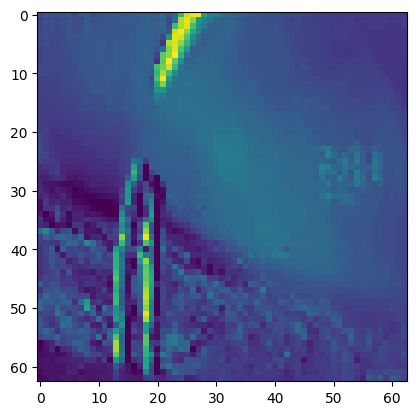

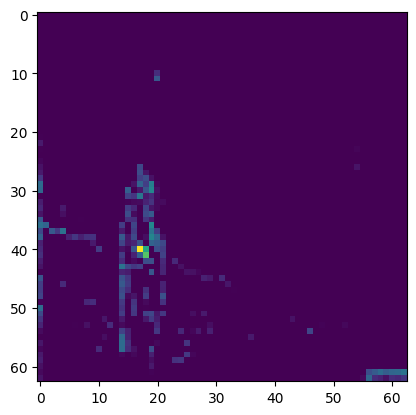

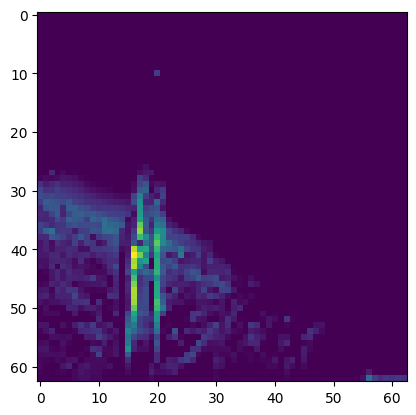

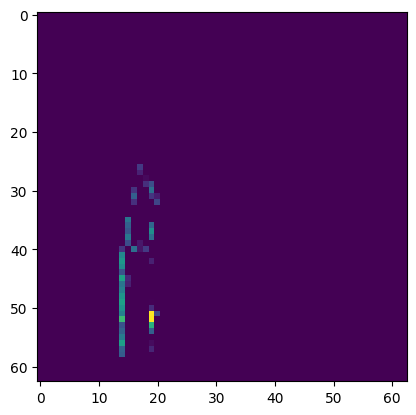

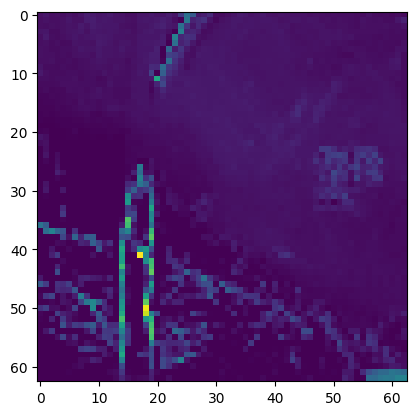

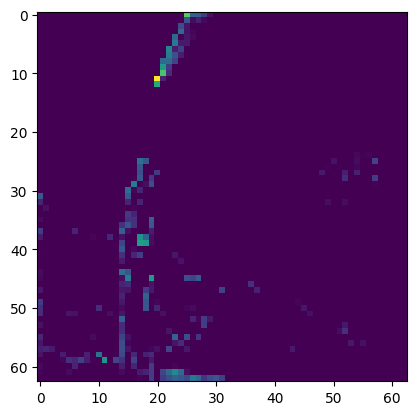

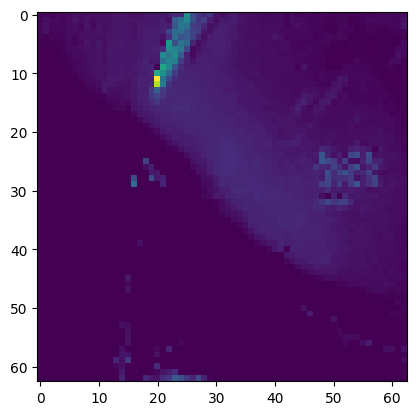

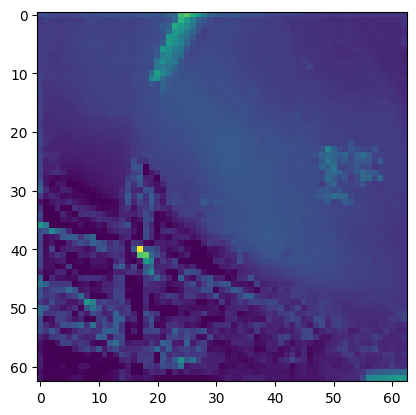

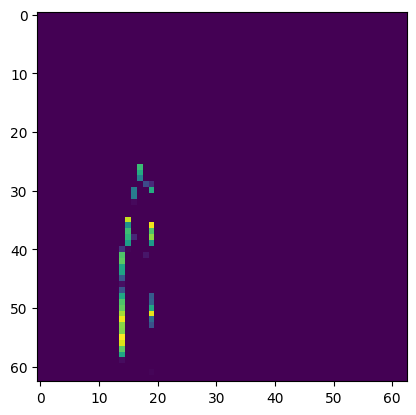

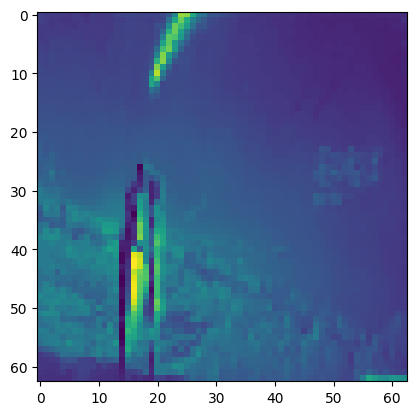

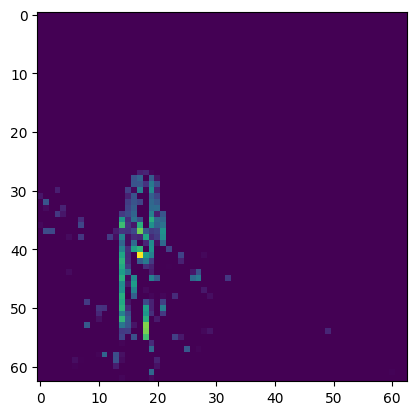

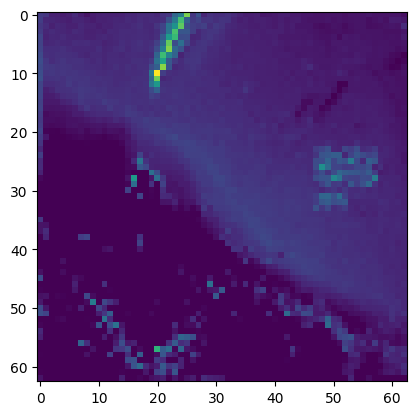

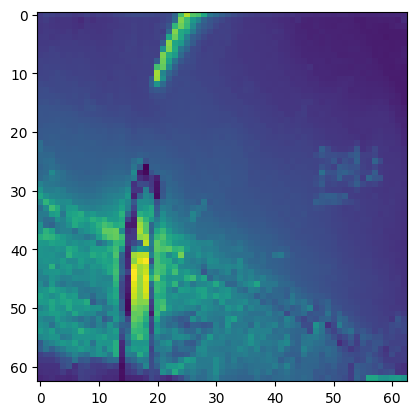

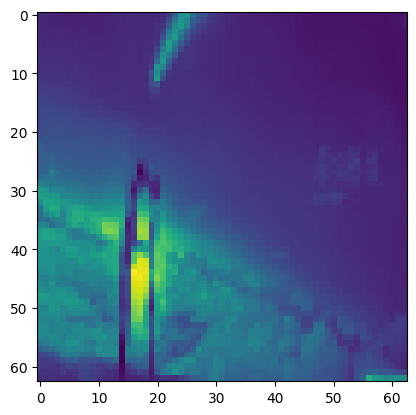

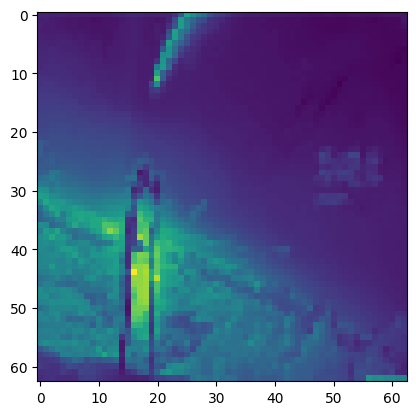

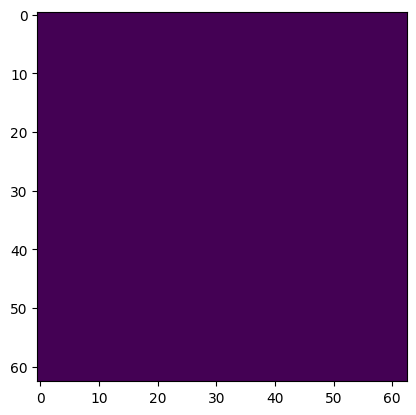

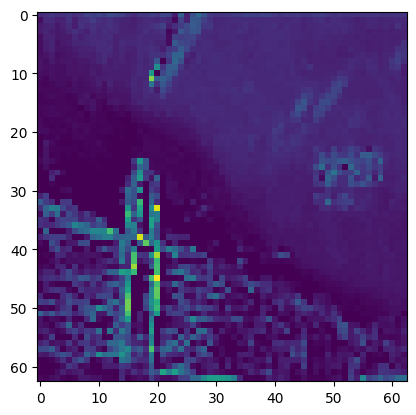

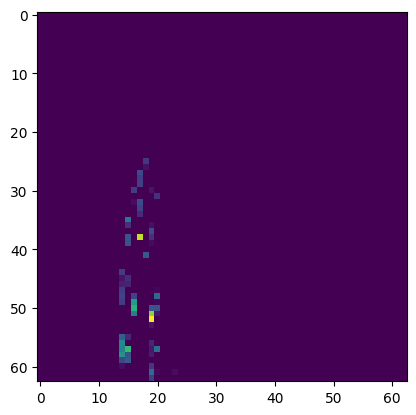

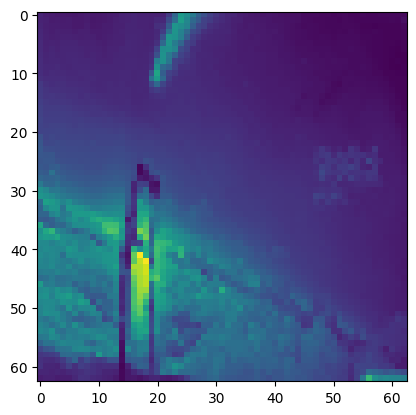

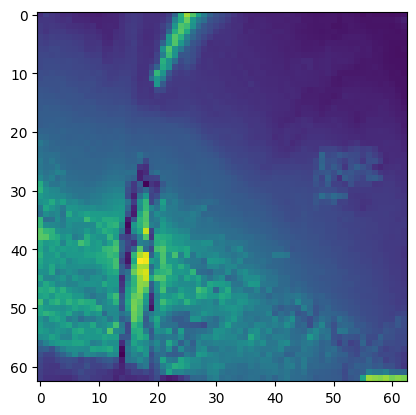

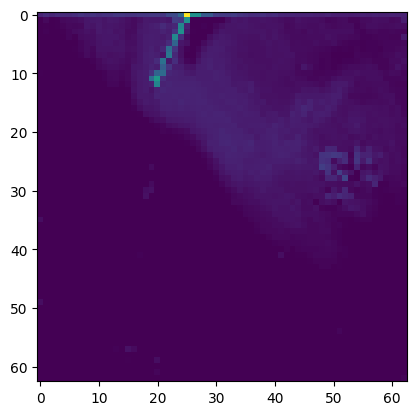

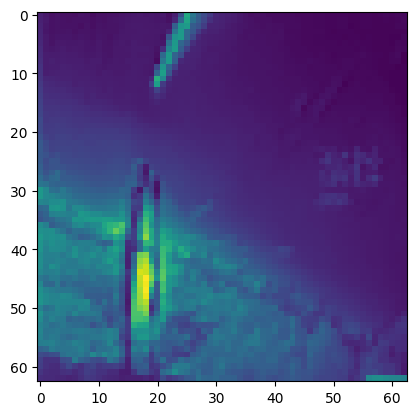

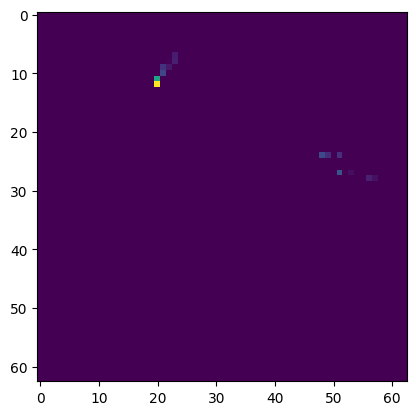

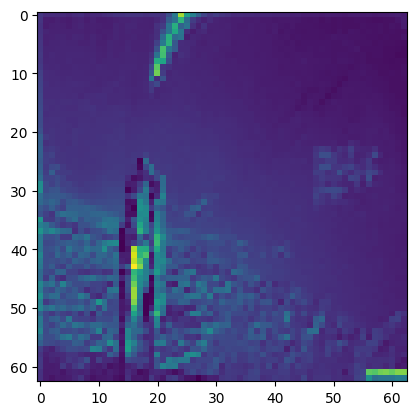

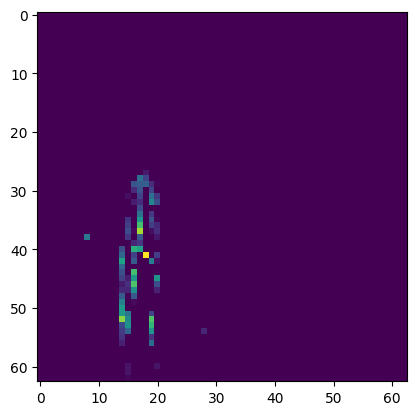

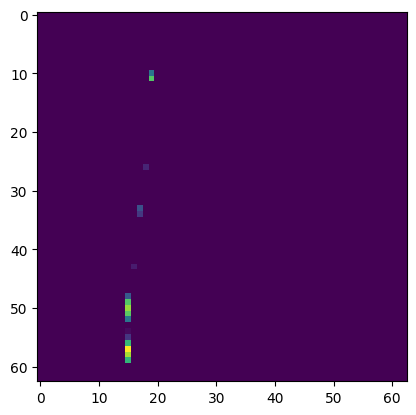

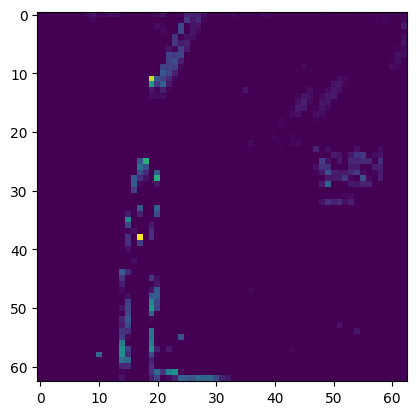

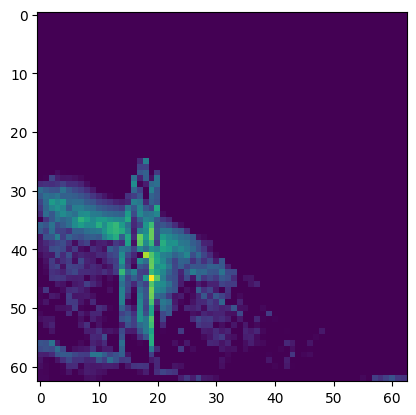

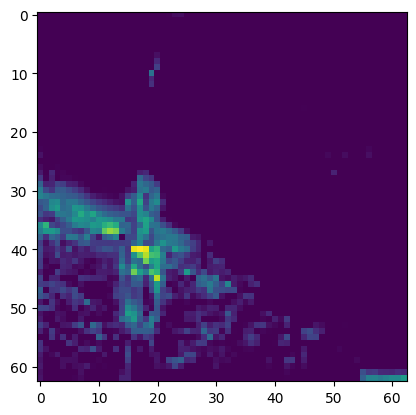

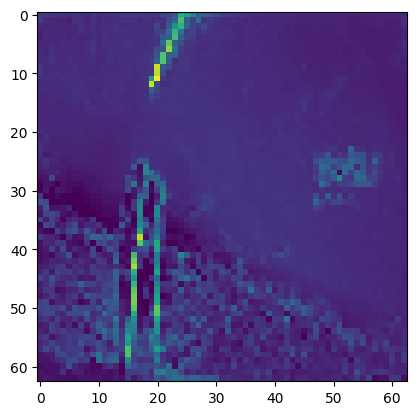

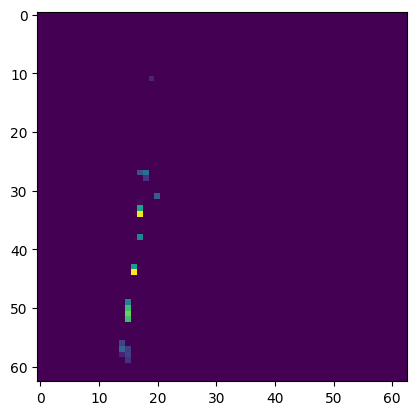

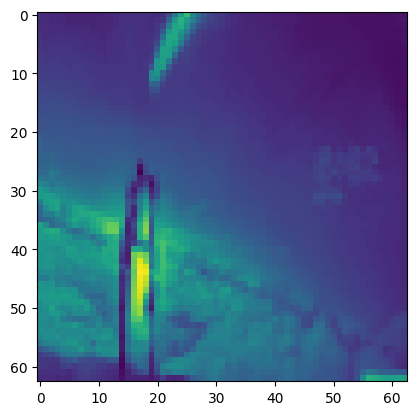

In [23]:
for i in range(img_model.shape[-1]):
    plt.imshow(img_model[0, :, :, i])
    plt.show()